In [5]:
import pandas as pd

data = {
    "Amount": [120.5, 300.0, 500.7, 80.2, 900.3, 150.0, 750.8, 60.5, 820.9, 200.0],
    "V1": [-1.23, 2.10, -3.20, 0.20, -4.50, 1.20, -2.80, 0.10, -3.90, 1.50],
    "V2": [0.45, -1.30, 2.20, -0.10, 3.60, 0.50, 3.00, -0.20, 3.40, 0.30],
    "V3": [-0.98, 0.40, -1.50, 0.30, -2.30, -0.20, -1.90, 0.40, -2.10, -0.10],
    "V4": [1.2, -0.5, 3.1, -0.4, 4.1, 0.6, 2.8, -0.3, 3.6, 0.4],
    "Class": [0, 0, 1, 0, 1, 0, 1, 0, 1, 0]
}

df_small = pd.DataFrame(data)

df_small.to_csv("fraud_small.csv", index=False)

print("fraud_small.csv created successfully!")


fraud_small.csv created successfully!


In [6]:
df = pd.read_csv("fraud_small.csv")
df.columns = df.columns.str.strip()

print(df)
print(df['Class'].value_counts())


   Amount    V1    V2    V3   V4  Class
0   120.5 -1.23  0.45 -0.98  1.2      0
1   300.0  2.10 -1.30  0.40 -0.5      0
2   500.7 -3.20  2.20 -1.50  3.1      1
3    80.2  0.20 -0.10  0.30 -0.4      0
4   900.3 -4.50  3.60 -2.30  4.1      1
5   150.0  1.20  0.50 -0.20  0.6      0
6   750.8 -2.80  3.00 -1.90  2.8      1
7    60.5  0.10 -0.20  0.40 -0.3      0
8   820.9 -3.90  3.40 -2.10  3.6      1
9   200.0  1.50  0.30 -0.10  0.4      0
Class
0    6
1    4
Name: count, dtype: int64


In [7]:
import matplotlib.pyplot as plt
import joblib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [8]:
print("Fraud vs Non-Fraud:")
print(df['Class'].value_counts())

X = df.drop('Class', axis=1)
y = df['Class']

Fraud vs Non-Fraud:
Class
0    6
1    4
Name: count, dtype: int64


In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, stratify=y, random_state=42
)

In [10]:
lr = LogisticRegression(max_iter=500)
lr.fit(X_train, y_train)

lr_pred = lr.predict(X_test)

In [11]:
print("\nLogistic Regression Results:")
print(classification_report(y_test, lr_pred))


Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       0.00      0.00      0.00         1

    accuracy                           0.67         3
   macro avg       0.33      0.50      0.40         3
weighted avg       0.44      0.67      0.53         3



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [12]:
rf = RandomForestClassifier(
    n_estimators=50,
    random_state=42,
    n_jobs=-1
)

In [13]:
rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)

print("\nRandom Forest Results:")
print(classification_report(y_test, rf_pred))


Random Forest Results:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



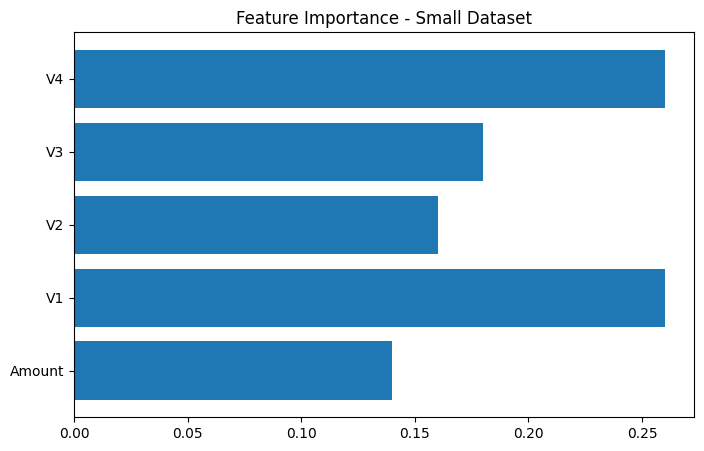

Model saved as rf_small_model.pkl


In [14]:
plt.figure(figsize=(8,5))
plt.barh(X.columns, rf.feature_importances_)
plt.title("Feature Importance - Small Dataset")
plt.show()

joblib.dump(rf, "rf_small_model.pkl")

print("Model saved as rf_small_model.pkl")